In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('crop_production.csv')

In [4]:
df.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [6]:
df.shape

(246091, 7)

In [7]:
df.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

### Seems Like we have some missing values in "production" colum, so we will start from there

In [9]:
(df['Production'].isnull().sum() /df.shape[0] ) * 100

1.5156994770227274

#### MIssing values amount to only 1.5%(neglegible amount) of total values in dataset, so we can simply drop the rows with missing values

In [10]:
df.dropna(subset=["Production"],axis=0,inplace=True)

In [11]:
df.shape

(242361, 7)

In [12]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

### Now, let's visualize the data to get more understanding

### Checking for Correlation between variables

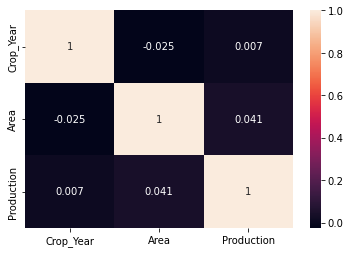

In [13]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Create the correlation heatmap for numeric columns
plt.tick_params(labelsize=10)
sns.heatmap(numeric_df.corr(), annot=True);


### no high-correlation found :(

## Univariate Analysis


In [14]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [15]:
df.State_Name.nunique()

33

### States and UTs combined in State_name column

In [16]:
df.State_Name.value_counts()

State_Name
Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                    

## District Variable

In [17]:
df.District_Name.nunique()

646

In [18]:
df.District_Name.unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [19]:
df.District_Name.value_counts()

District_Name
TUMKUR       931
BELGAUM      924
BIJAPUR      905
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: count, Length: 646, dtype: int64

## Crop Year Variable



In [20]:
df.Crop_Year.value_counts()

Crop_Year
2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: count, dtype: int64

In [21]:
print(f"{df.Crop_Year.nunique() = }")
print(f"{df.Crop_Year.min() = }")
print(f"{df.Crop_Year.max() = }")

df.Crop_Year.nunique() = 19
df.Crop_Year.min() = 1997
df.Crop_Year.max() = 2015


### Our Dataset has data for 19 years from 1997 to 2015. Top years are 2003, 2002, 2007–08 and 2006.

### Season Variable



In [22]:
df.Season.value_counts()

Season
Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: count, dtype: int64

In [23]:
print(f"{df.Season.nunique() = }")
print(f"{df.Season.unique() = }")
print(f"{df.Season.max() = }")

df.Season.nunique() = 6
df.Season.unique() = array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)
df.Season.max() = 'Winter     '


## Crop Variable

In [24]:
df['Crop'].nunique()

124

In [25]:
df['Crop'].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [26]:
df['Crop'].max()

'other oilseeds'

In [27]:
df['Crop'].min()

'Apple'

In [28]:
df['Crop'].value_counts().head(10)

Crop
Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Groundnut             8770
Wheat                 7878
Sugarcane             7827
Rapeseed &Mustard     7533
Arhar/Tur             7476
Name: count, dtype: int64

In [29]:
df['Crop'].value_counts().tail(10)

Crop
Perilla            9
Jobster            9
Turnip             8
Pear               6
Plums              6
Litchi             6
Coffee             6
Apple              4
Peach              4
Other Dry Fruit    1
Name: count, dtype: int64

## Area Variable

In [30]:
df['Area'].nunique()

38391

In [31]:
df['Area'].max()

8580100.0

In [32]:
df['Area'].min()

0.1

In [33]:
df['Area'].value_counts().head(10)

Area
1.0      3573
2.0      3140
100.0    2621
3.0      2478
4.0      2182
5.0      2090
6.0      1750
200.0    1671
10.0     1590
7.0      1555
Name: count, dtype: int64

In [34]:
df['Area'].value_counts().tail(10)

Area
63107.0     1
13655.0     1
95399.0     1
71644.0     1
17459.0     1
25569.0     1
19349.0     1
90302.0     1
39698.0     1
279151.0    1
Name: count, dtype: int64

## Production Variable


In [35]:
df['Production'].describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f52387044c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5238704af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5238704310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5238705030>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5238705300>],
 'means': []}

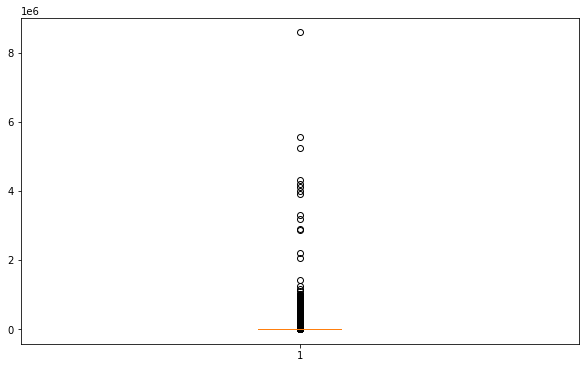

In [36]:
# Let's plot the Area range
plt.figure(figsize=(10, 6))
plt.boxplot(df['Area'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f523875dc00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f523875e1a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f523875d930>],
 'medians': [<matplotlib.lines.Line2D at 0x7f523875e740>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f523875ea10>],
 'means': []}

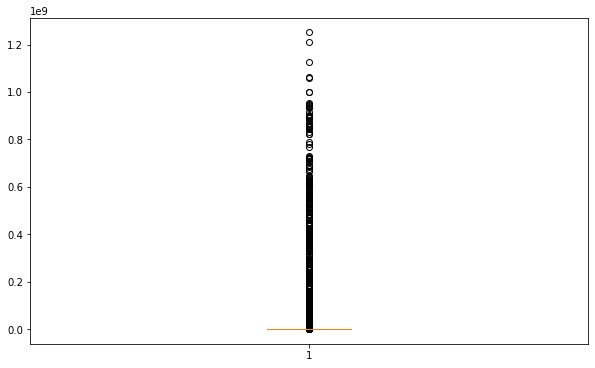

In [37]:
# Let's ploat Production Range
plt.figure(figsize=(10, 6))

plt.boxplot(df['Production'])

### Both Production and Area variables are having many outliers

# Bivariate Analysis



In [38]:
Prod = df.groupby('State_Name')['Production'].sum().reset_index()
Prod = Prod.sort_values(by='Production', ascending=False).head(10)
pd.options.display.float_format = '{:.2f}'.format
Prod

,State_Name,Production
15,Kerala,97880045375.70
1,Andhra Pradesh,17324590296.00
27,Tamil Nadu,12076443048.93
30,Uttar Pradesh,3234492662.70
3,Assam,2111751759.00
32,West Bengal,1397904389.70
17,Maharashtra,1263640606.20
14,Karnataka,863429811.68
0,Andaman and Nicobar Islands,718223239.99
24,Punjab,586385001.00


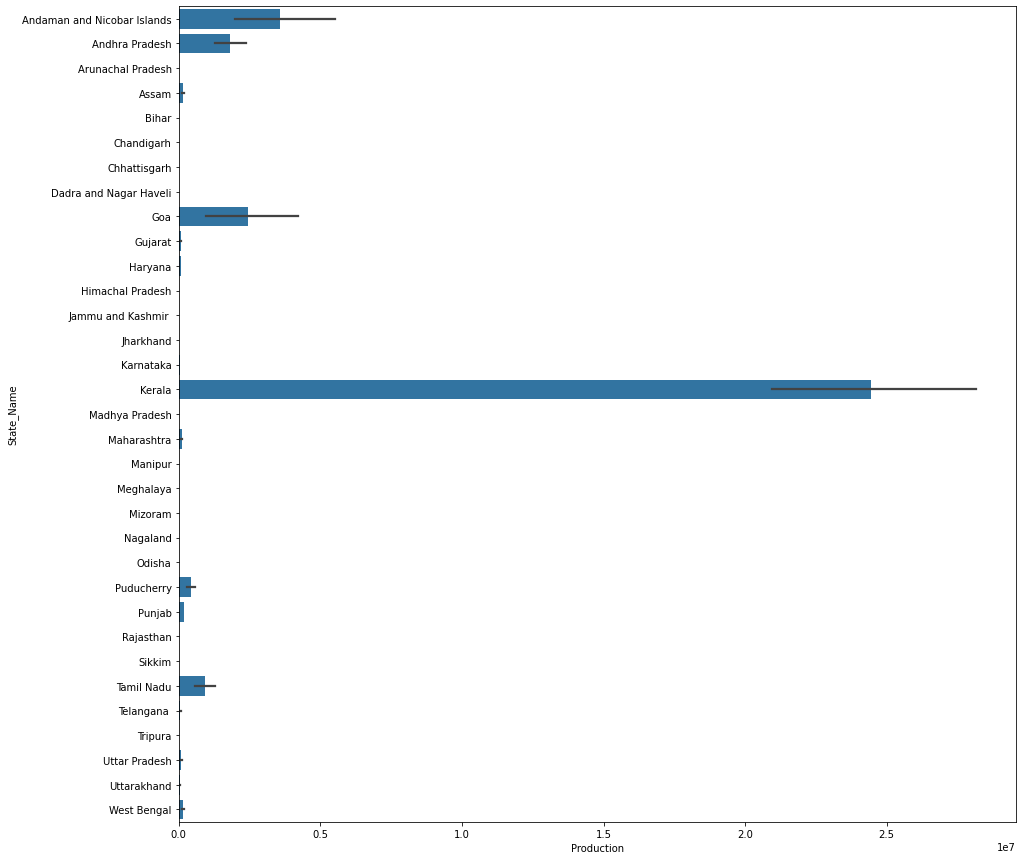

In [39]:
plt.figure(figsize= (15,15))
sns.barplot(x=df['Production'],y= df["State_Name"], orient='h');

### Kerala is top state when we look at the quantum of Production for last 19.years.

## Exploratory Analysis and Visualization
Dataset has been preprocessed for next step that’s Exploring all the variables and their levels(for categorical variables) for extracting important insights which defines the Indian cultivation and how its progressing in future.

In [40]:
df.describe()

,Crop_Year,Area,Production
count,242361.00,242361.00,242361.00
mean,2005.63,12167.41,582503.44
std,4.96,50857.44,17065813.17
min,1997.00,0.10,0.00
25%,2002.00,87.00,88.00
50%,2006.00,603.00,729.00
75%,2010.00,4545.00,7023.00
max,2015.00,8580100.00,1250800000.00


(array([2.42347e+05, 6.00000e+00, 5.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([1.00000000e-01, 1.71602008e+06, 3.43204006e+06, 5.14806004e+06,
        6.86408002e+06, 8.58010000e+06]),
 <BarContainer object of 5 artists>)

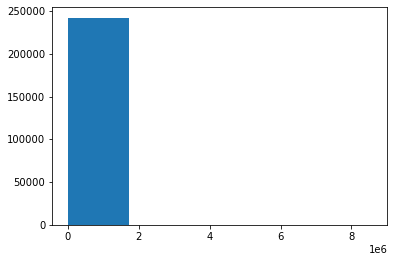

In [41]:
plt.hist(df.Area, bins = 5)

(array([2.42304e+05, 5.70000e+01]),
 array([0.0000e+00, 6.2540e+08, 1.2508e+09]),
 <BarContainer object of 2 artists>)

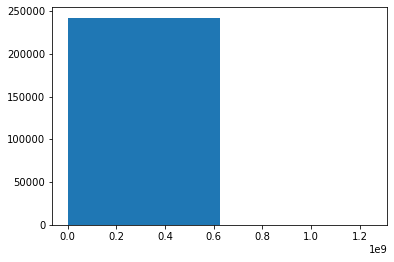

In [42]:
plt.hist(df.Production, bins = 2)

## New Variables
- Looking at the seven variables, we could extract more information if new variable could be created using present variables. Some of the possibilities are:

- Different zones (Union Terr, South Zone, NE Zone, East Zone, North Zone, Central Zone and West Zone)
  Different categories (Cereal, Pulses,Fruits,Beans,Vegetables, Spices, fibers, Nuts, Natural Polymer,Coffee, Tea, Total   foodgrain, Pulses, Oilseeds, Paddy, Commercial, Sugarcane, forage plants and Others)

In [43]:
#Zone-Wise Production - 1997-2014
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [44]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

df['Zones'] = df.apply(get_zonal_names, axis=1)
df['Zones'].unique()

array(['Union Terr', 'South Zone', 'NE Zone', 'East Zone', 'North Zone',
       'Central Zone', 'West Zone'], dtype=object)

In [45]:
df.Zones.value_counts()

Zones
South Zone      53500
North Zone      49874
East Zone       43261
West Zone       33134
Central Zone    32972
NE Zone         28284
Union Terr       1336
Name: count, dtype: int64

#### Using Zonal information, we can decipher the top zones are South India, North India and East India.

In [46]:
crop=df['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

df['cat_crop']=df['Crop'].apply(cat_crop)

In [47]:
df["cat_crop"].value_counts()

cat_crop
Cereal        63283
Pulses        40898
oilseeds      33801
Vegetables    23154
spices        21638
Nuts          11472
Commercial    10561
fibres         9785
Beans          9115
Fruits         6153
Name: count, dtype: int64

#### Looking at the new variable cat_crop, top frequency of crop types are Cereal, Pulses and oilseeds.

In [49]:
data_explore = df.copy()

## Visualization on Important variables:
## a. Zonal distribution of crops:

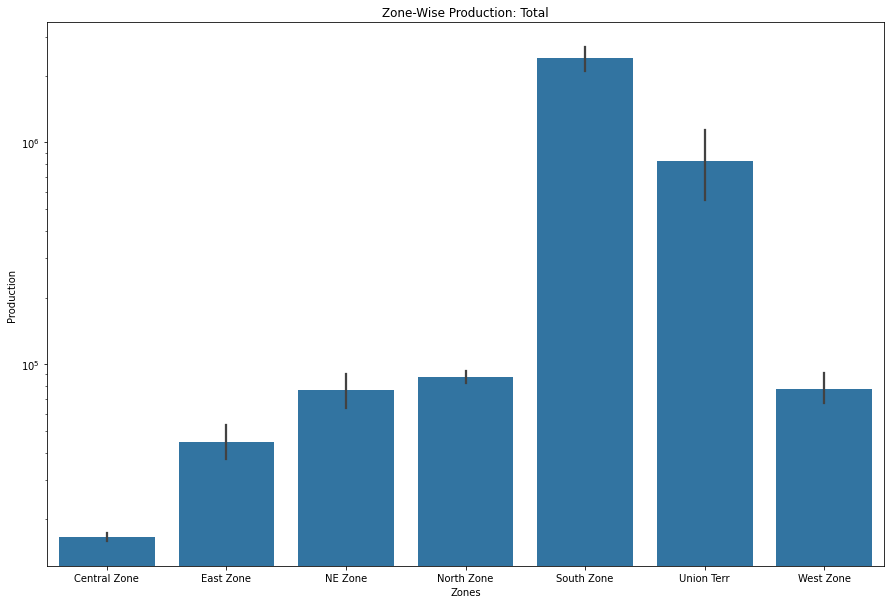

In [51]:
# Sort the data by 'Zones' column
sorted_data = data_explore.sort_values(by='Zones', ascending=True)

# Create the bar plot
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=sorted_data['Zones'], y=sorted_data['Production'])
plt.yscale('log')
plt.title('Zone-Wise Production: Total')

# Show or save the plot
plt.show()

### Production wise top zone is South India


/tmp/ipykernel_519/4050434880.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=south_zone["State_Name"], y=south_zone["Production"], errwidth=0)


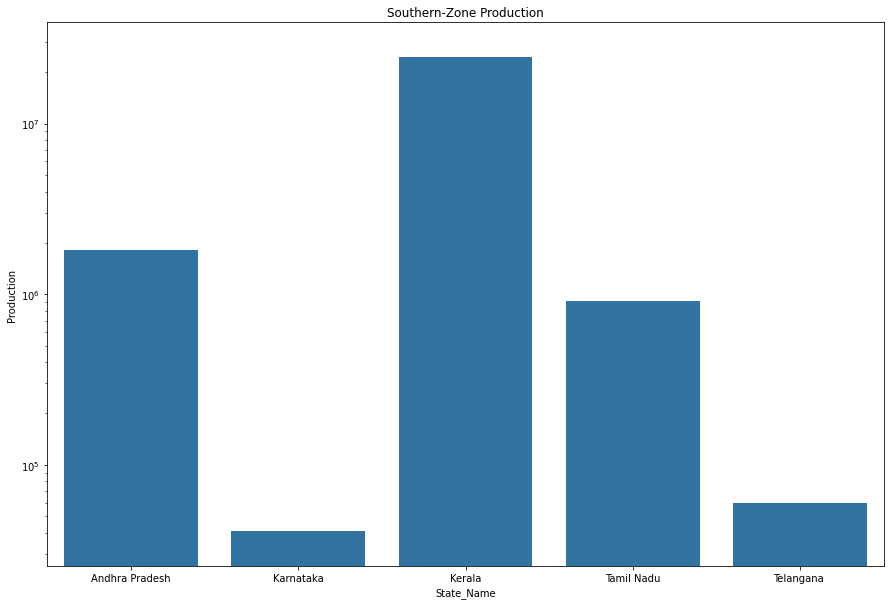

In [53]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=south_zone["State_Name"], y=south_zone["Production"], errwidth=0)
plt.yscale('log')
plt.title('Southern-Zone Production')

# Show or save the plot
plt.show()

### Top South Indian states are Kerala, Andhra Pradesh and Tamil Nadu
## b. Crop wise Production status:

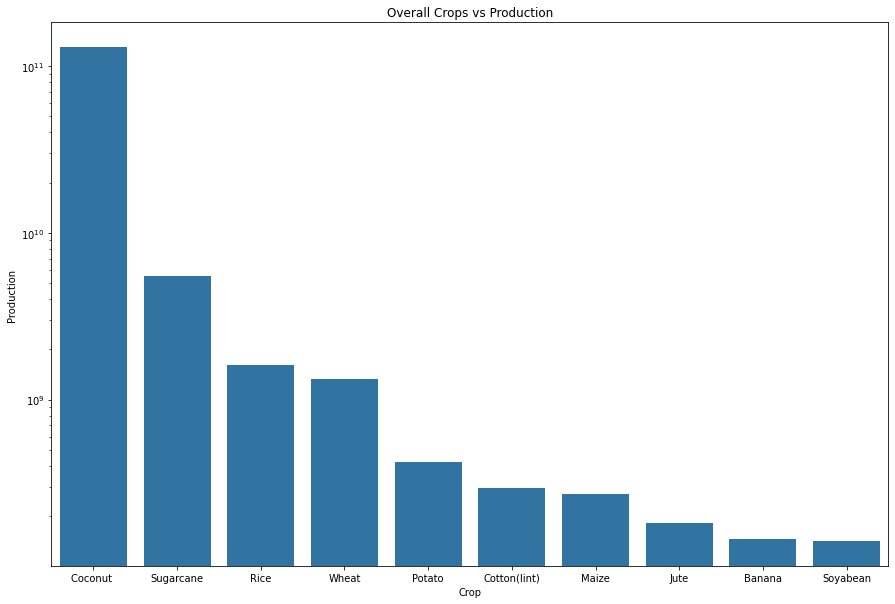

In [55]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=crop['Crop'], y=crop['Production'])
plt.yscale('log')
plt.title('Overall Crops vs Production')

# Show or save the plot
plt.show()

### Top Crops Production wise are: Coconut, Sugarcane and Rice
## c. Yearwise Production Status:

<AxesSubplot:xlabel='Crop_Year'>

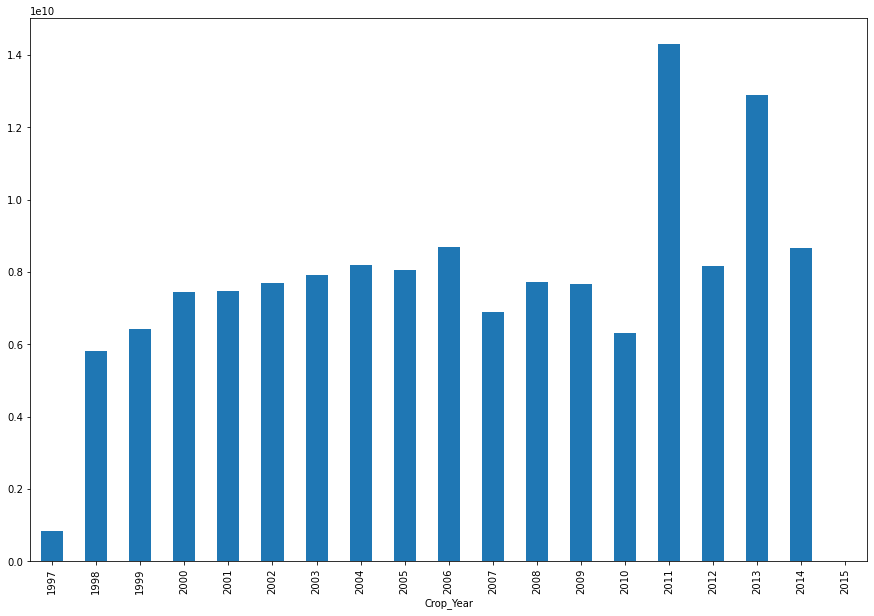

In [57]:
plt.figure(figsize=(15, 10))
plt.tick_params(labelsize=10)
data_explore.groupby("Crop_Year")["Production"].agg("sum").plot.bar()

### High productive years are 2011, 2013 and 2014.
## d. Season wise Production Status:


/tmp/ipykernel_519/373813042.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=season['Season'], y=season['Production'], errwidth=0)


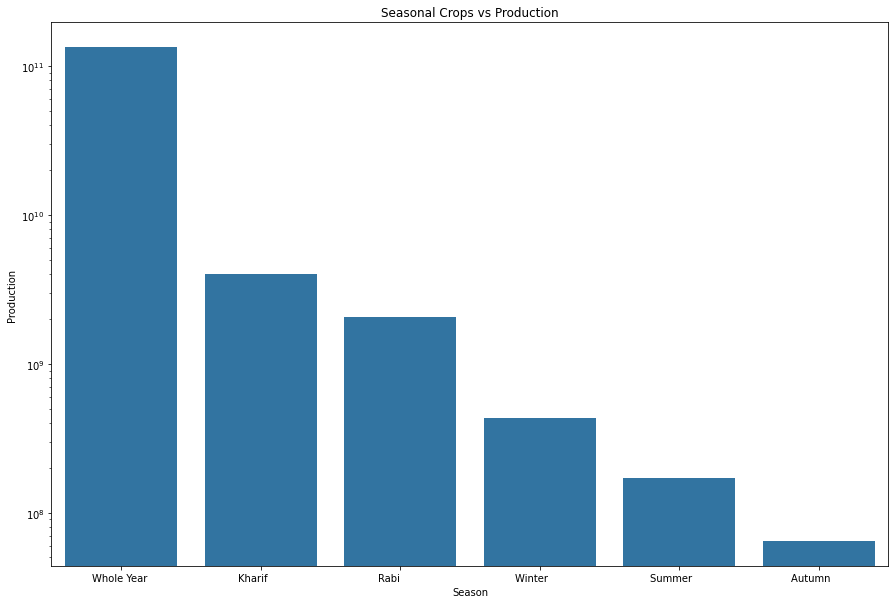

In [60]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=season['Season'], y=season['Production'], errwidth=0)
plt.yscale('log')
plt.title('Seasonal Crops vs Production')

# Show or save the plot
plt.show()

### Top crop categories which shows high production values are Whole Year(Annual growing plants), Kharif and Rabi crops. It clearly shows these crops heavily dependent on seasonal monsoons.
## e. Crop wise Production plot describing production values for all crop types.

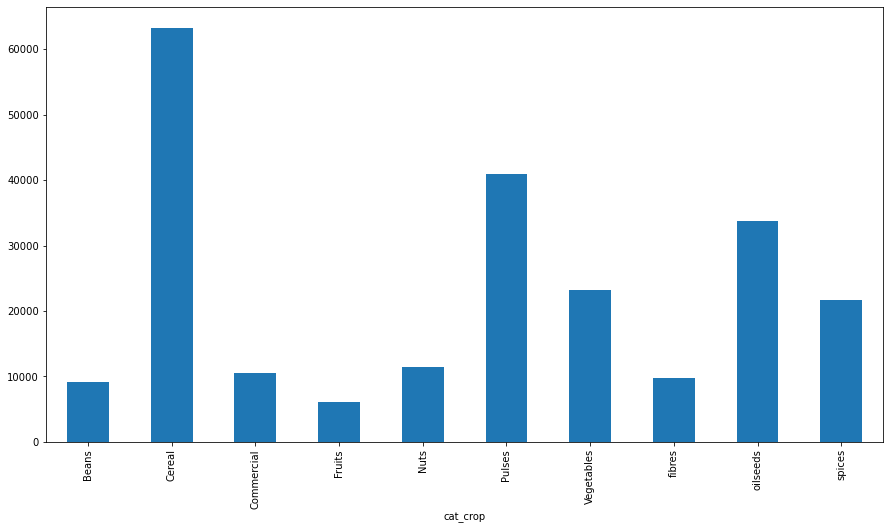

In [61]:
plt.figure(figsize=(15,8))
plt.tick_params(labelsize=10)
data_explore.groupby("cat_crop")["Production"].agg("count").plot.bar()
plt.show()

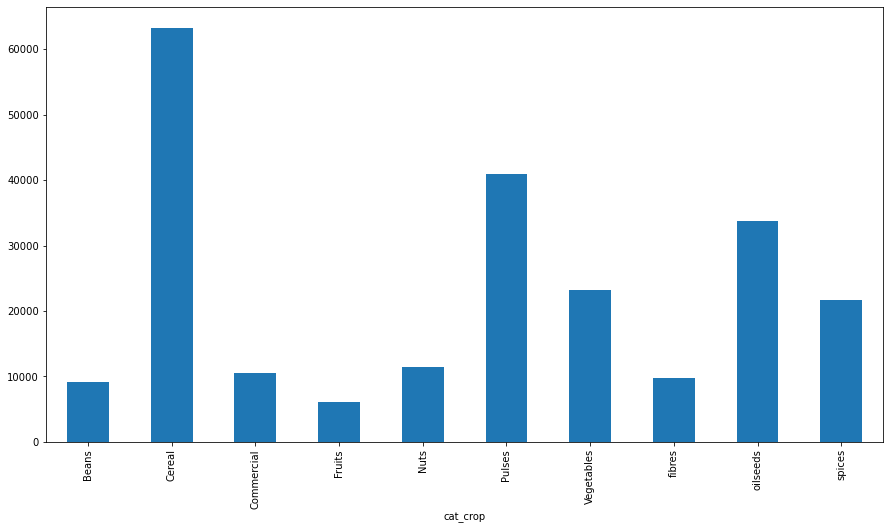

In [62]:
plt.figure(figsize=(15,8))
plt.tick_params(labelsize=10)
data_explore.groupby("cat_crop")["Production"].agg("count").plot.bar()
plt.show()

### Top crop categories are Cereal, Pulses and Oilseeds.
## f. State versus Crop Category versus Season plot:

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


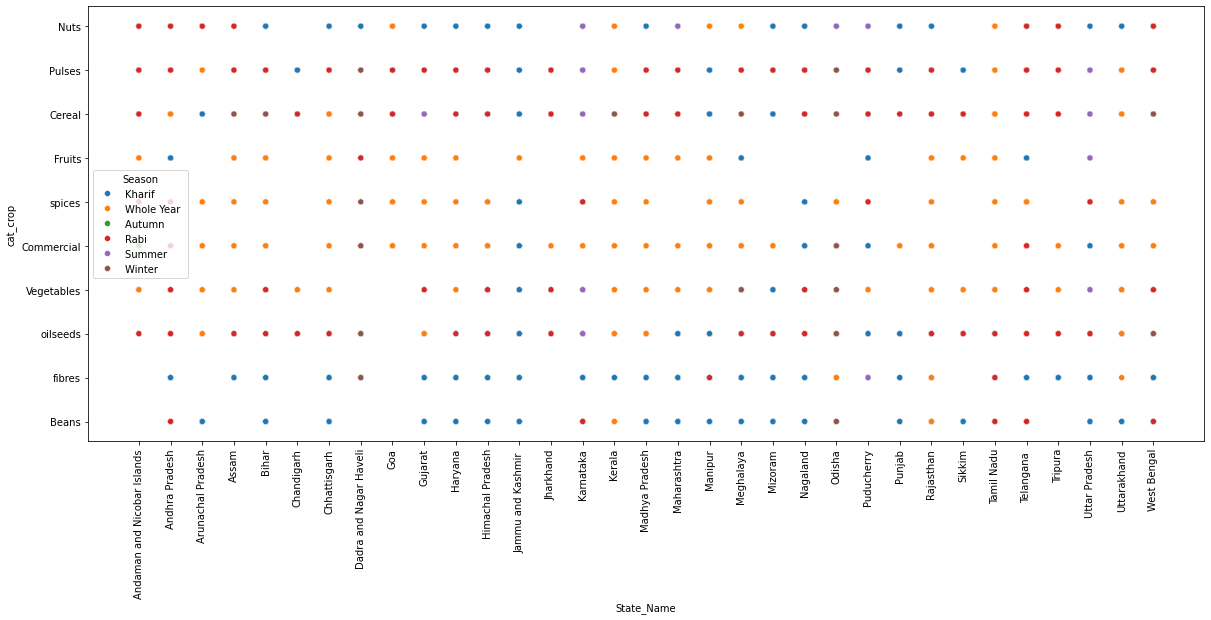

In [63]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=data_explore,x="State_Name",y="cat_crop",hue="Season")
plt.xticks(rotation=90)
plt.show()

## Interesting facts:

### South zone: i. Top producing state Kerala shows a abundance of whole year seasonal crops
### North Zone: ii. Top producing state Uttar Pradesh shows abundance of Kharif, Rabi and Summar crops
## g. Different proportion of Crop Categories for India

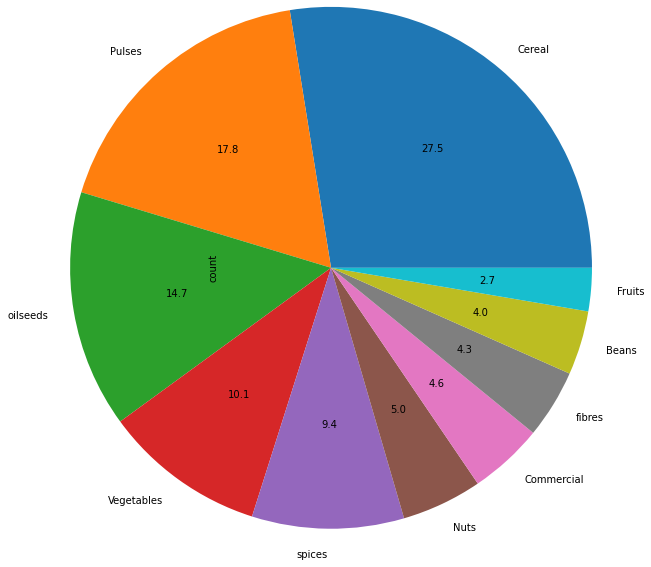

In [64]:
df1=data_explore["cat_crop"].value_counts()
df1.plot(radius=3,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)

## Q 1: Which State dominates in crop production with different categories of crops?

### Strategy:

**Step 1: Making a cross table using State Name and Crop categories**

To answer this question, we'll create a cross-table or pivot table that summarizes crop production data by both State Name and Crop categories. This will allow us to see how crop production is distributed across different states and crop types.

**Step 2: Visualizing cross table data in the form of a stacked bar plot**

Once we have the cross table, we can visualize the data in the form of a stacked bar plot. Stacked bar plots are useful for showing the contribution of each state to the total crop production for different crop categories. This visualization will help us identify which state dominates in crop production for various crop types.


In [65]:
df_2 = pd.crosstab(data_explore['State_Name'], data_explore['cat_crop'])
df_2

cat_crop,Beans,Cereal,Commercial,Fruits,Nuts,Pulses,Vegetables,fibres,oilseeds,spices
State_Name,,,,,,,,,,
Andaman and Nicobar Islands,0,20,15,16,37,9,20,0,11,52
Andhra Pradesh,386,2264,474,502,674,1336,1046,333,1101,802
Arunachal Pradesh,26,1021,168,0,26,67,257,0,343,637
Assam,0,2952,854,920,400,2234,1781,1284,2097,1338
Bihar,280,6108,756,226,130,3731,1775,924,2504,1396
Chandigarh,0,39,0,0,0,14,26,0,7,0
Chhattisgarh,646,1805,316,264,261,2087,1143,535,1496,1288
Dadra and Nagar Haveli,0,116,12,9,9,64,0,13,30,1
Goa,0,62,22,16,47,32,0,0,0,12


<Figure size 1800x576 with 0 Axes>

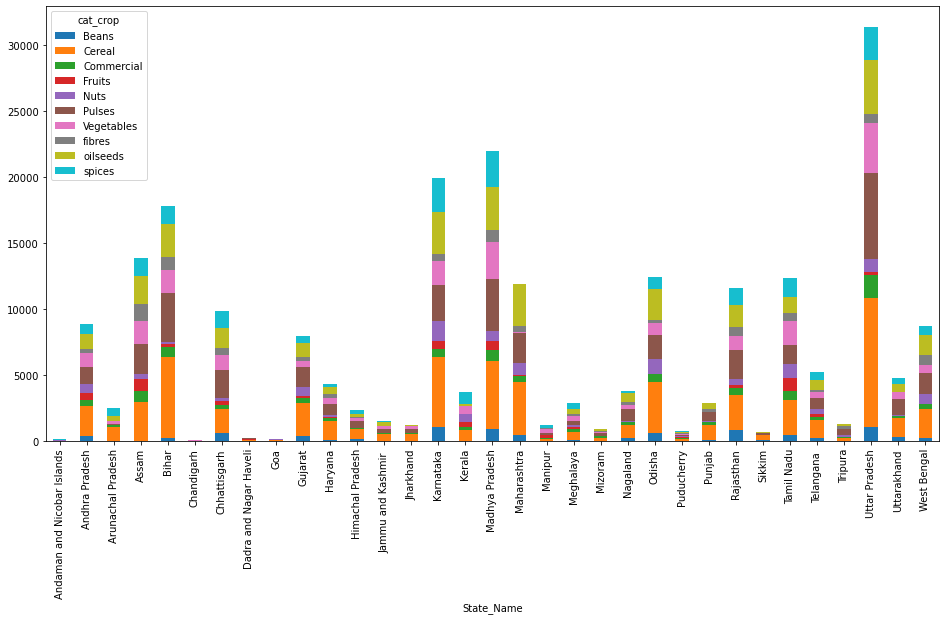

In [72]:
plt.figure(figsize=(25, 8))
df_2.plot(kind='bar', stacked=True, figsize = (16,8));

# Answer:
## Uttar Pradesh is topping in producing more crop categories than any other Indian state.

**Q 2: Which Crop is seen in high frequency and when and where is it grown in India?

### Strategy:

### Step 1: value.count() on Crop variable to find the high frequency crop in the dataset.

**Step 2: Making a season of data only for that crop**

**Step 3: Finding out the season when it is grown heavily**

**Step 4: Finding out which state predominately produces it**

**Step 5: Finding out which District produces this crop highly**

**Step 6: Finding out which year the production figures are high**

**Step 7: Finding out Area versus Production relationship for this crop production**

In [73]:
data_explore["Crop"].value_counts()[:5]

Crop
Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Name: count, dtype: int64

In [74]:
rice_df = data_explore[data_explore["Crop"]=="Rice"]
print(rice_df.shape)
rice_df[:3]

(15082, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,Union Terr,Cereal
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,Union Terr,Cereal
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,Union Terr,Cereal
